In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as SA

In [12]:
engine = SA.create_engine('mssql+pyodbc://@localhost/WeddingAddresses?trusted_connection=yes&driver=SQL+Server+Native+Client+11.0')

In [28]:
address_book = pd.read_excel("Master Wedding Invite List.xlsx", sheet_name="PythonCleanedFinalList", dtype=str)
address_book

,Category,Name on Envelope,Street Address 1,Street Address 2,City,State/Region,Zip/Postal Code,Country
0,Alex - Family,Mr. Michael Robinson & Mrs. Carolyn Epperly,32 Hasell St.,NaN,Charleston,SC,29401,USA
1,Alex - Family,Ms. Caitrin Robinson,32 Hasell St.,NaN,Charleston,SC,29401,USA
2,Alex - Family,Mr. Robert & Mrs. Ciara Lemery,56 Pleasant Ridge Dr.,NaN,Asheville,NC,28805,USA
3,Alex - Family,TC Kida & Keely Robinson,822 Nickerson St.,NaN,Seattle,WA,98119,USA
4,Alex - Family,Mr. Angus & Mrs. Kim Duncan,2381 NW Johnson St,NaN,Portland,OR,97210,USA
...,...,...,...,...,...,...,...,...
87,Katie - Mixed,Ms. Stacy Drudy,2236 Iroquois Ln,NaN,Falls Church,VA,22043,USA
88,Katie - Mixed,Mrs. Teresa & Mr. Aaron Hamm,13724 Latonia Ct,NaN,Gainesville,VA,20155,USA
89,Katie - Mixed,Ms. Terri Roman,8244 Lapin Ct,NaN,Seminole,FL,33777,USA
90,Katie - Mixed,Mrs. Trae Yates & Mr. Michael Roach,44 Dunrobin Dr,NaN,Martinsburg,WV,25405,USA


In [19]:
states = address_book['State/Region'].value_counts()

<AxesSubplot:>

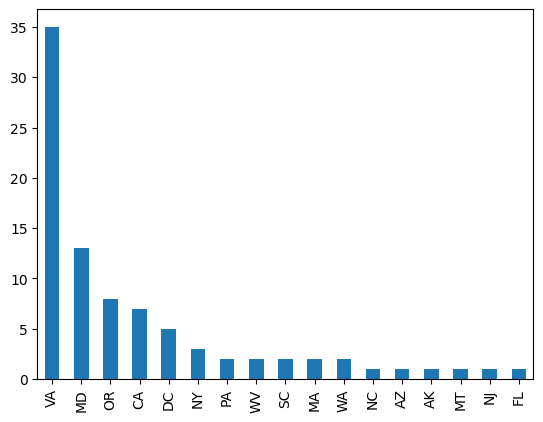

In [22]:
states.plot(kind="bar")

In [29]:
# Add data to SQL server
address_book.to_sql("AddressBook", engine, if_exists="replace", index=False)

-1

In [33]:
# Check and see if the data was added with a pandas query and that all zip codes are 5 digits
query = "SELECT * FROM AddressBook WHERE len([Zip/Postal Code]) = 5"
pd.read_sql(query, engine)

,Category,Name on Envelope,Street Address 1,Street Address 2,City,State/Region,Zip/Postal Code,Country
0,Alex - Family,Mr. Michael Robinson & Mrs. Carolyn Epperly,32 Hasell St.,None,Charleston,SC,29401,USA
1,Alex - Family,Ms. Caitrin Robinson,32 Hasell St.,None,Charleston,SC,29401,USA
2,Alex - Family,Mr. Robert & Mrs. Ciara Lemery,56 Pleasant Ridge Dr.,None,Asheville,NC,28805,USA
3,Alex - Family,TC Kida & Keely Robinson,822 Nickerson St.,None,Seattle,WA,98119,USA
4,Alex - Family,Mr. Angus & Mrs. Kim Duncan,2381 NW Johnson St,None,Portland,OR,97210,USA
...,...,...,...,...,...,...,...,...
82,Katie - Mixed,Ms. Stacy Drudy,2236 Iroquois Ln,None,Falls Church,VA,22043,USA
83,Katie - Mixed,Mrs. Teresa & Mr. Aaron Hamm,13724 Latonia Ct,None,Gainesville,VA,20155,USA
84,Katie - Mixed,Ms. Terri Roman,8244 Lapin Ct,None,Seminole,FL,33777,USA
85,Katie - Mixed,Mrs. Trae Yates & Mr. Michael Roach,44 Dunrobin Dr,None,Martinsburg,WV,25405,USA


In [35]:
# This should be 87
pd.read_sql("SELECT COUNT(*) FROM AddressBook WHERE [Street Address 1] IS NOT NULL", engine)

,
0,87
